In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 


In [2]:
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


By seeing the info Now we knew some important thing

As we can see there are null values in Cabin and Age

Our data have different types values

- {PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare} -> are numerical

- 

{Name,Sex,Ticket,Cabin,Embarked} -> are categorical

Some feature are unnecessary like

- {PassengerID -> because it doesnot mean anything

- {Name -> it doesnot mean anything untill and unlees there is a title in it

- {Ticket -> itself it object dtype but we will convert it to numerical and find the pattern

- {Cabin -> most of the values are null (that means they dont have separate cabin )

In [5]:
df=df.drop(['PassengerId'],axis=1)
df.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [6]:
df.shape


(891, 9)

In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
survived=df[df['Survived']==1]
df2=survived.groupby('Sex')['Survived'].count().reset_index()

In [10]:
df2.head()

,Sex,Survived
0,female,233
1,male,109


In [11]:
#ratios is
men=df.loc[df['Sex']=='male']['Sex'].count()
men_survived=len(df[(df['Survived']==1) & (df['Sex']=='male')])
print("the ratio of men that survived",str(round(men_survived*100/men,2)))


the ratio of men that survived 18.89


In [12]:
women=len(df[df['Sex']=='female'])
women_survived=int(df2[df2['Sex']=='female']['Survived'])

print("the ratio of women that survived",str(round(women_survived*100/women,2)))

the ratio of women that survived 74.2


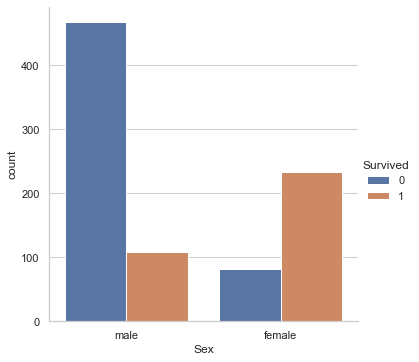

In [38]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

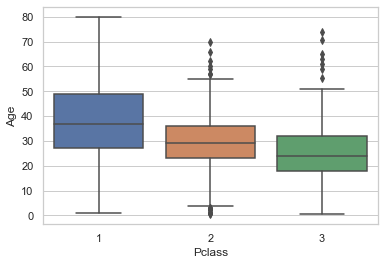

In [14]:
ax = sns.boxplot(x='Pclass', y='Age', data=df)

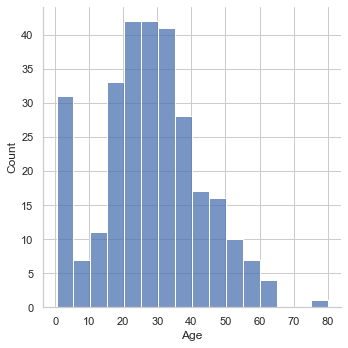

In [15]:
df3=df.loc[df['Survived']==1]
sns.displot(df3['Age'],kde=False)

In [16]:
df.drop(['Name'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
df.describe(include=["O"])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

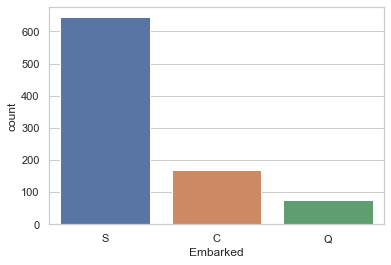

In [19]:
sns.countplot(df.loc[df['Embarked'].notnull()]['Embarked'])


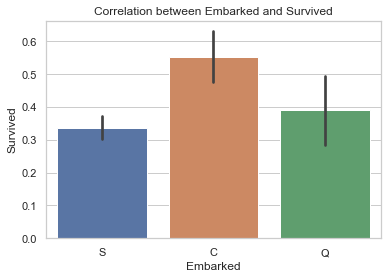

In [20]:
# as we can see there are null values in embarked column
sns.barplot(data=df,x="Embarked",y="Survived")
plt.title("Correlation between Embarked and Survived")
plt.show()

#### more rate of survival in C 

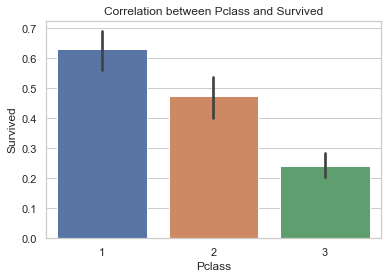

In [21]:
sns.barplot(data=df,x="Pclass",y="Survived")
plt.title("Correlation between Pclass and Survived")
plt.show()

#### more rate of 1st class

In [22]:
df["Category_feature"]=pd.qcut(df["Fare"],4) #divide the fare Columns into 4 equal sized bins
df["Category_feature"].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Category_feature, dtype: int64

In [23]:

df.loc[df["Fare"] <= 7.91 , "Fare" ]=0
df.loc[(df["Fare"] > 7.91) & (df["Fare"] < 14.454),"Fare"]=1
df.loc[(df["Fare"] > 14.454) & (df["Fare"] <= 31.0),'Fare']=2
df.loc[(df["Fare"] > 31.0),"Fare"]=3
df["Fare"]=df["Fare"].astype(int)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category_feature
0,0,3,male,22.0,1,0,0,S,"(-0.001, 7.91]"
1,1,1,female,38.0,1,0,3,C,"(31.0, 512.329]"
2,1,3,female,26.0,0,0,1,S,"(7.91, 14.454]"
3,1,1,female,35.0,1,0,3,S,"(31.0, 512.329]"
4,0,3,male,35.0,0,0,1,S,"(7.91, 14.454]"


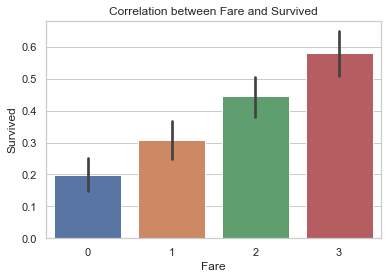

In [25]:
sns.barplot(data=df,x="Fare",y="Survived")
plt.title("Correlation between Fare and Survived")
plt.show()

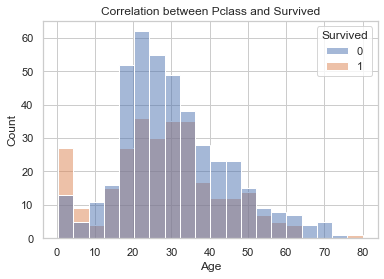

In [26]:
sns.histplot(data=df,x="Age",hue="Survived")
plt.title("Correlation between Pclass and Survived")
plt.show()

In [27]:
df["Category_age"]=pd.qcut(df["Age"],5)

In [28]:
df.loc[df["Age"] <= 19.0,"Age"]=0  
df.loc[(df["Age"] > 19) & (df["Age"] <= 25),"Age"]=1
df.loc[(df["Age"] > 25) & (df["Age"] <= 31),"Age" ]=2
df.loc[(df["Age"] > 31) & (df["Age"] <= 40),"Age" ]=3
df.loc[(df["Age"] > 40) & (df["Age"] <= 80),"Age" ]=4


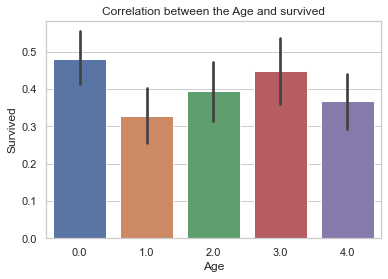

In [29]:
sns.barplot(data=df,x="Age",y="Survived")
plt.title("Correlation between the Age and survived")
plt.show()

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category_feature,Category_age
0,0,3,male,1.0,1,0,0,S,"(-0.001, 7.91]","(19.0, 25.0]"
1,1,1,female,3.0,1,0,3,C,"(31.0, 512.329]","(31.8, 41.0]"
2,1,3,female,2.0,0,0,1,S,"(7.91, 14.454]","(25.0, 31.8]"
3,1,1,female,3.0,1,0,3,S,"(31.0, 512.329]","(31.8, 41.0]"
4,0,3,male,3.0,0,0,1,S,"(7.91, 14.454]","(31.8, 41.0]"


In [33]:
df.drop(['Category_feature','Category_age'],axis=1,inplace=True)


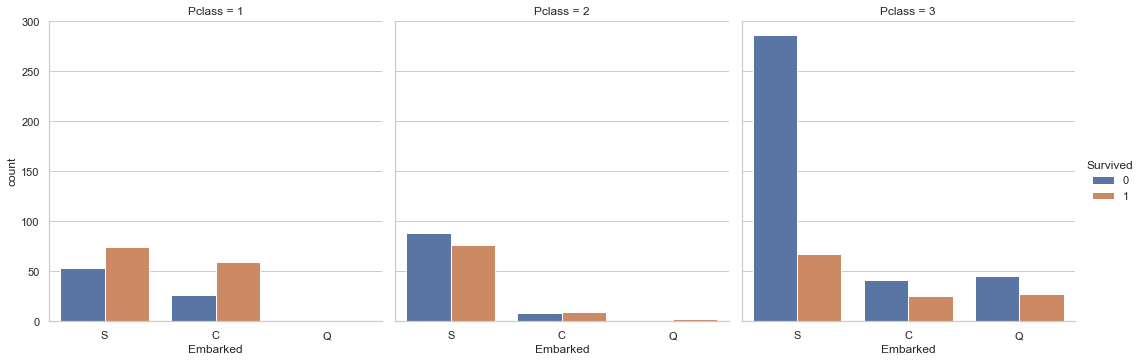

In [67]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

#higher class prefers staying in S mostly nd lower in C,Q

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,0,S
1,1,1,female,3.0,1,0,3,C
2,1,3,female,2.0,0,0,1,S
3,1,1,female,3.0,1,0,3,S
4,0,3,male,3.0,0,0,1,S


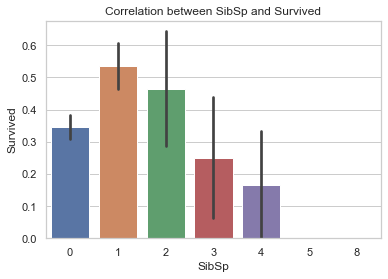

In [31]:
sns.barplot(data=df,x="SibSp",y="Survived")
plt.title("Correlation between SibSp and Survived")
plt.show()

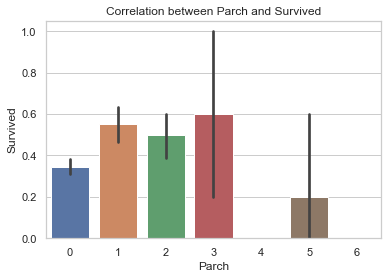

In [30]:
sns.barplot(data=df,x="Parch",y="Survived")
plt.title("Correlation between Parch and Survived")
plt.show()

In [35]:
df['Family']=df['SibSp']+df['Parch']+1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,1.0,1,0,0,S,2
1,1,1,female,3.0,1,0,3,C,2
2,1,3,female,2.0,0,0,1,S,1
3,1,1,female,3.0,1,0,3,S,2
4,0,3,male,3.0,0,0,1,S,1


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

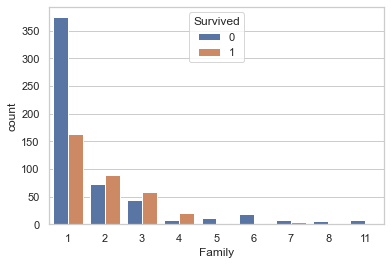

In [41]:
sns.countplot('Family',hue='Survived',data=df)

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alone', ylabel='count'>

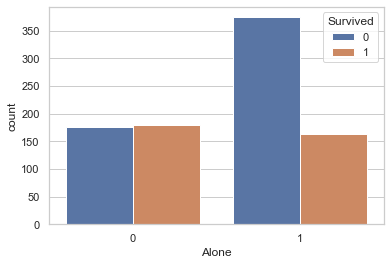

In [65]:
df['Alone'] = 0
df.loc[df.Family== 1, 'Alone'] = 1
df['Alone'].unique()
sns.countplot('Alone',hue='Survived',data=df)

In [36]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

<AxesSubplot:>

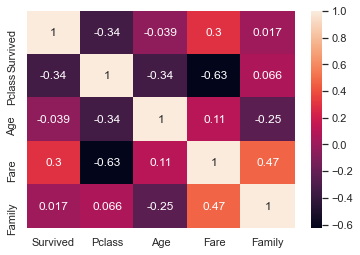

In [37]:
sns.heatmap(df.corr(),annot=True)

# Observations


- pclass nd fare are strongly correlated to survived
- 233 females, 109 males i.e women has higher rate of survival
- More rate of survival of 1st class
- more rate of survival fr passengers who paid more
- More rate of survival for people in C embarked
- family size lower than 5 had a higher rate of survival
- People of high class prefer staying in C or S(mostly)

